In [7]:
from sklearn.linear_model import LinearRegression
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime as dt
import pandas as pd
import numpy as np
import os
import matplotlib.ticker as ticker
from matplotlib.ticker import LinearLocator

%matplotlib inline
mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["axes.titlesize"] = 12
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 12
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["legend.fontsize"] = 8
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["image.cmap"] = "viridis"

ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
ALL_DIR = os.path.join(ROOT_DIR, "data", "All.csv")


In [8]:
def line_plot_count(data, title, xlabel="", ylabel=""):
    fig, ax = plt.subplots(figsize=(25, 2.5))

    ax.plot(data.index.values, data["URL"], color="black", linewidth=1)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.set_xlim(dt.date(2022, 1, 1), dt.date(2023,1,1))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_locator(LinearLocator(5))
    ax.xaxis.get_majorticklabels()[0].set_horizontalalignment("left")
    return fig


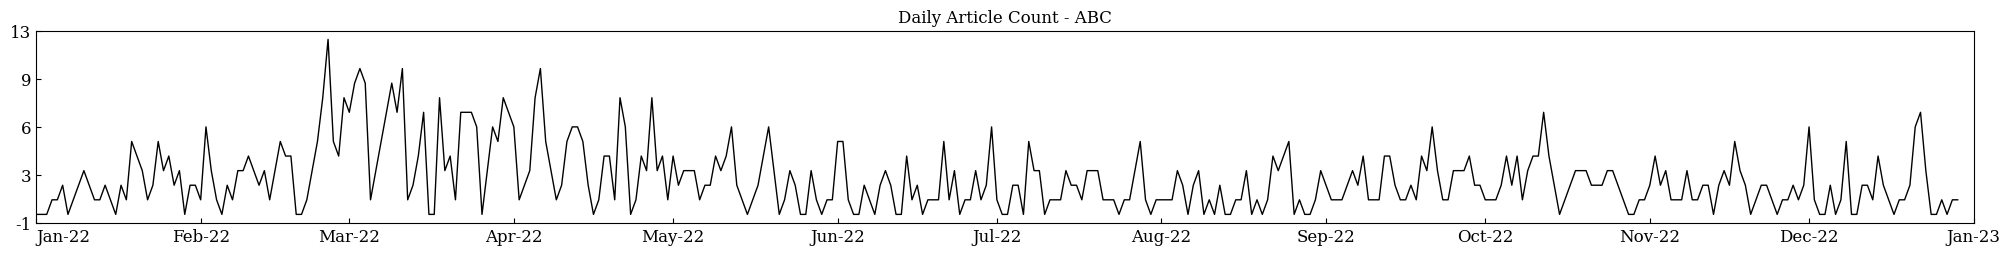

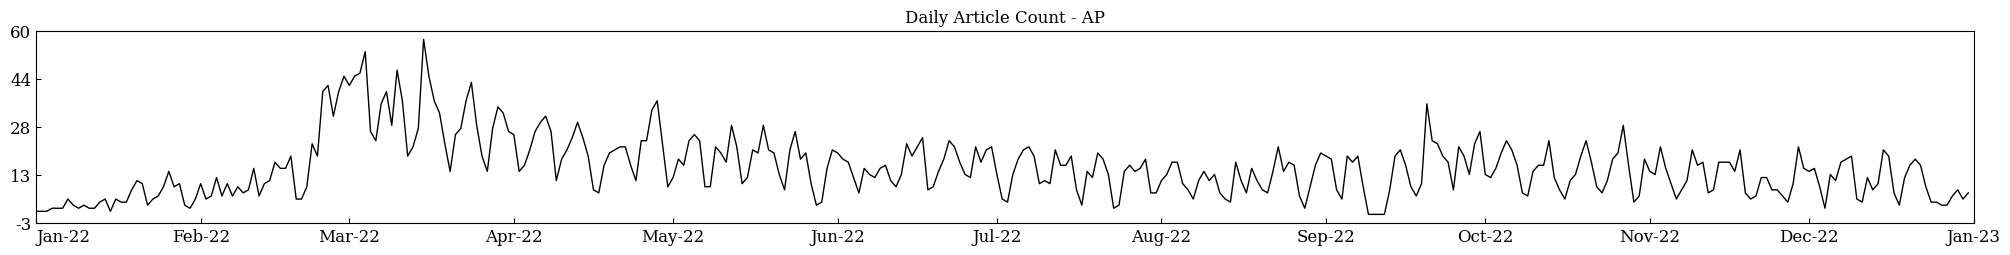

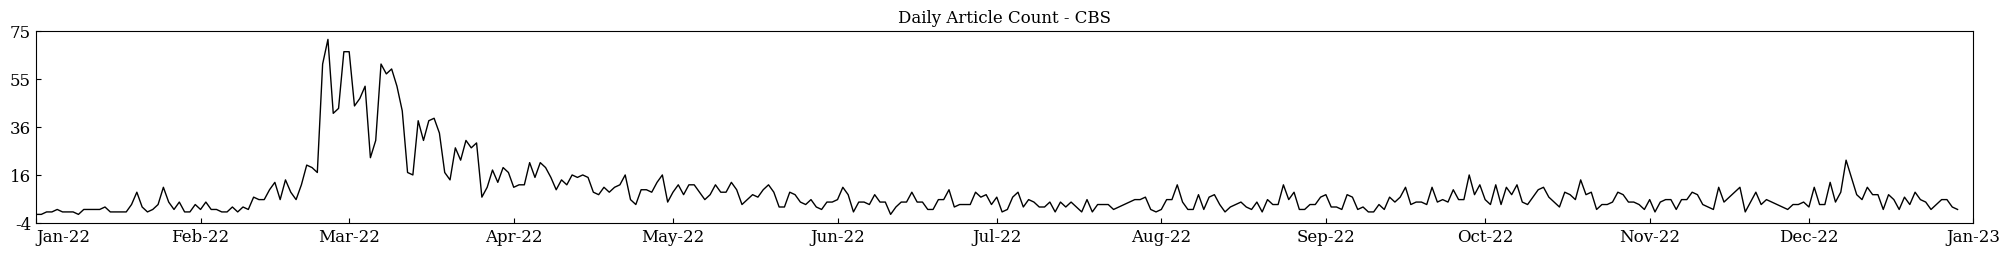

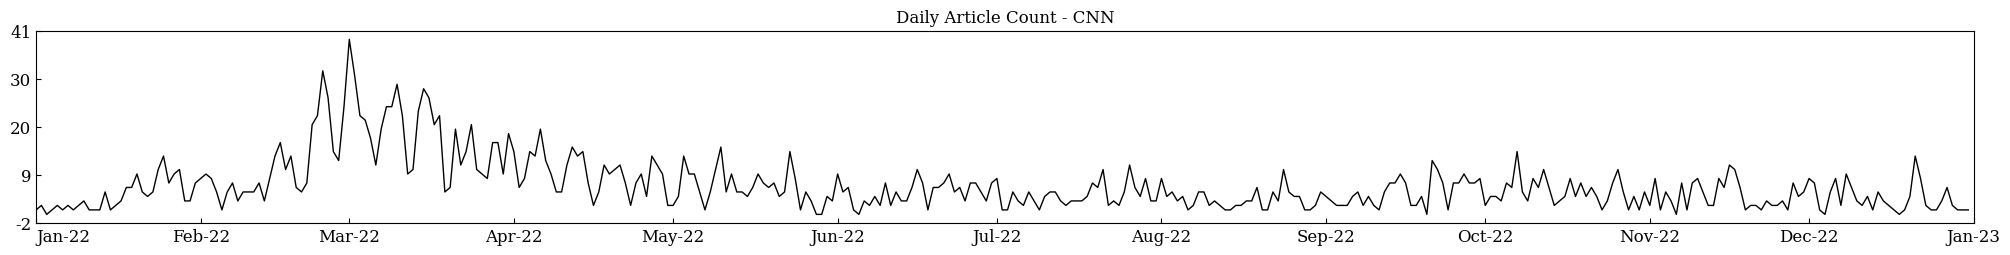

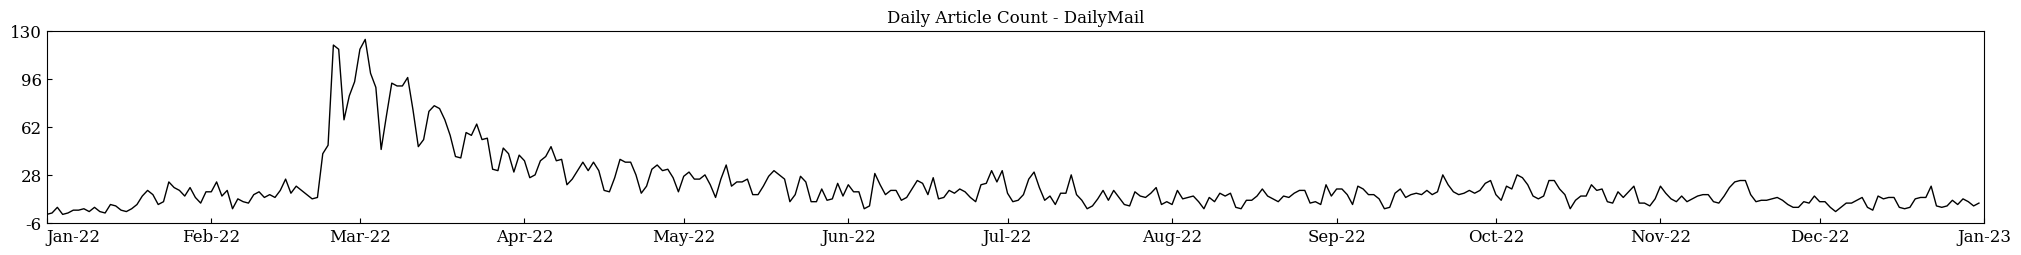

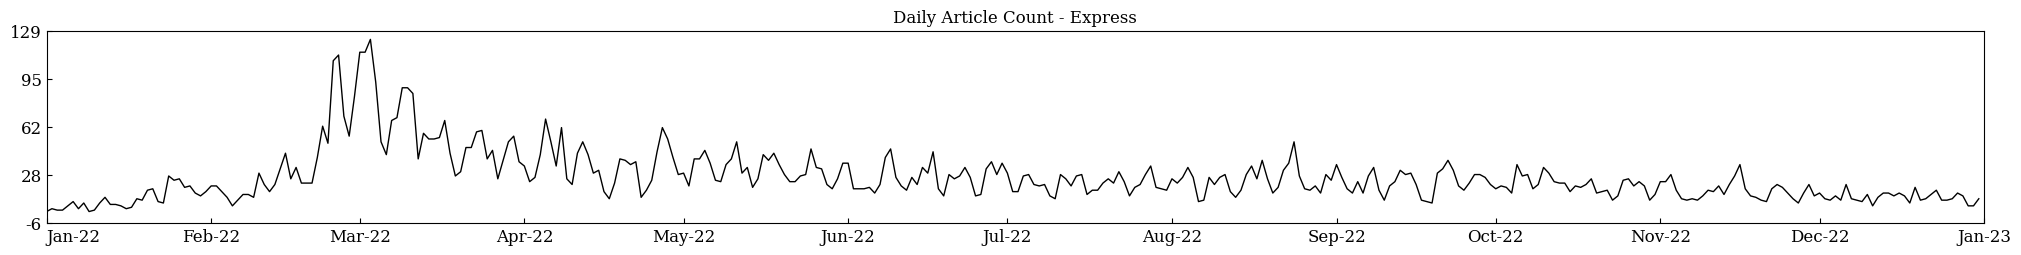

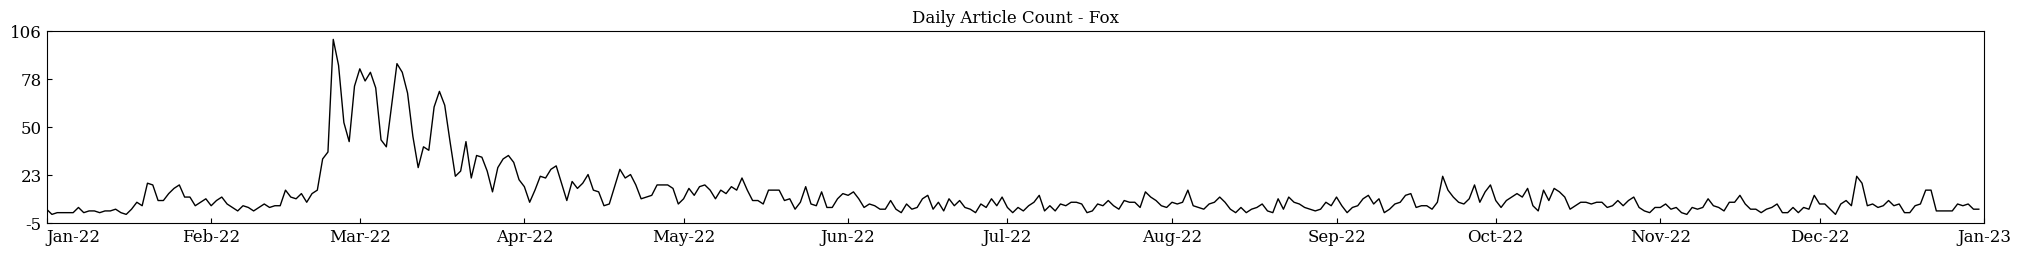

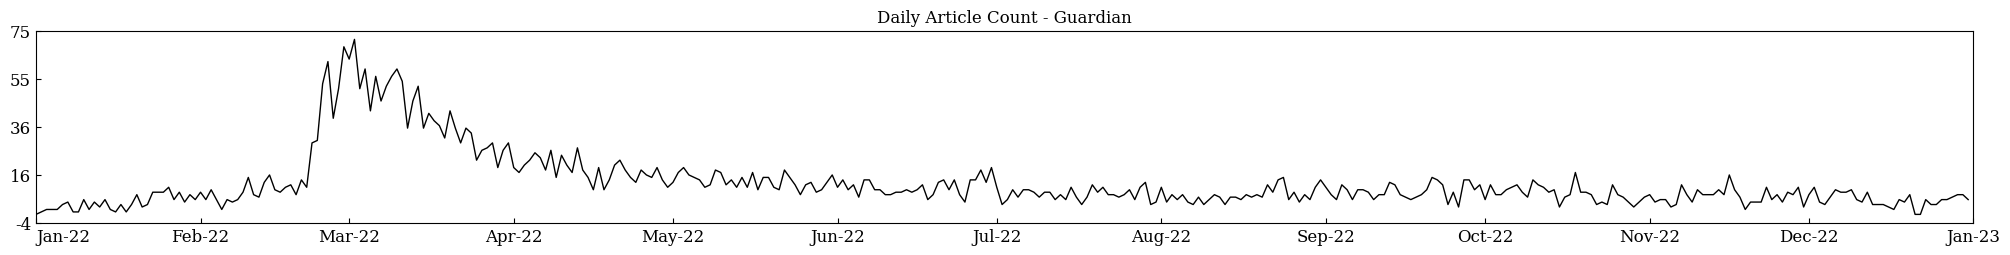

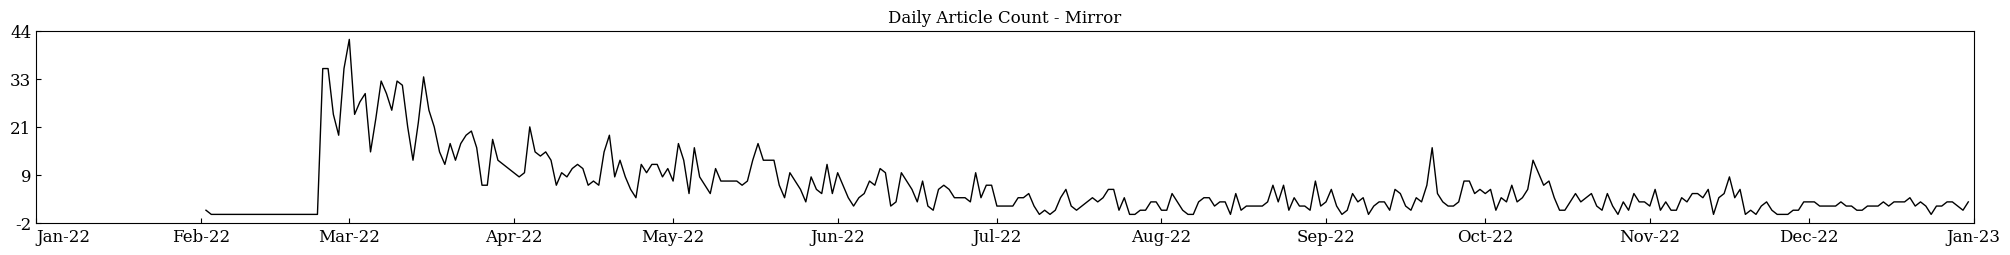

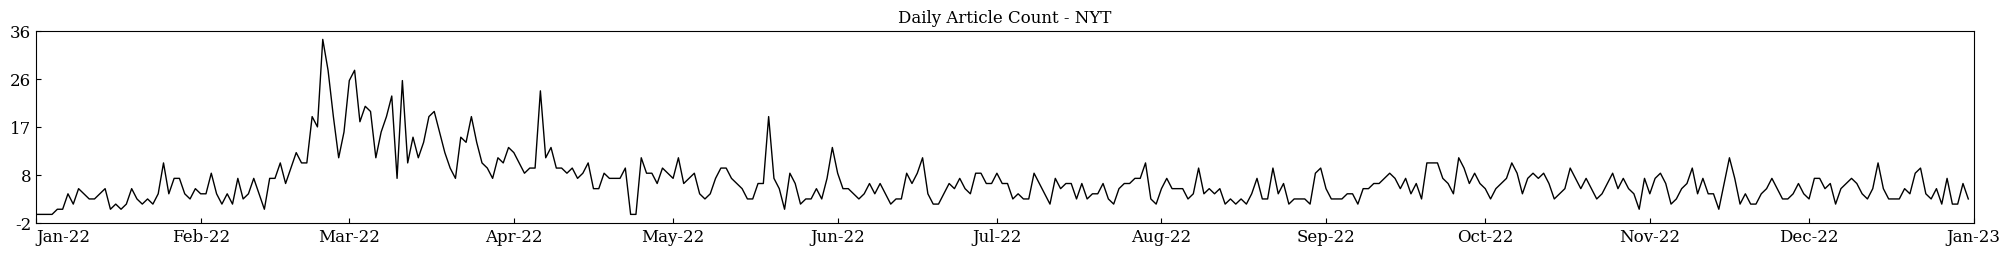

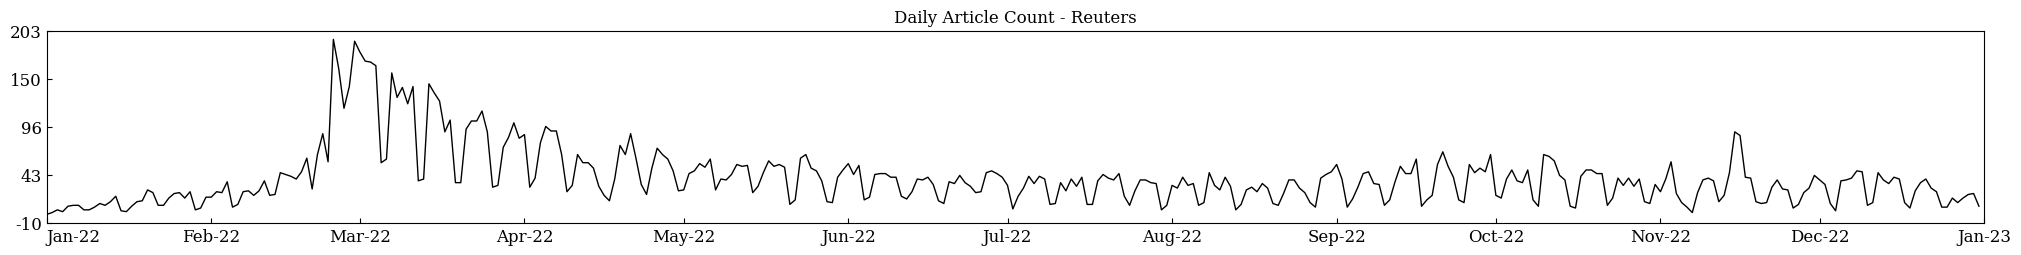

In [9]:
sources = ["ABC","AP","CBS","CNN","DailyMail","Express","Fox","Guardian","Mirror","NYT","Reuters"]

for source in sources:
    data_df = pd.read_csv(os.path.join(ROOT_DIR, f"results_1", source + "_Results.csv"), parse_dates=["Date"], index_col=["Date"])
    davg_df = data_df.drop(columns=["Title", "Text", "URL", "Topic"]).resample("D").mean()
    dcount_df = data_df.resample("D").apply({"URL": "count"})

    fig = line_plot_count(dcount_df, f"Daily Article Count - {source}")
    fig.savefig(os.path.join(ROOT_DIR, "figures","article_count", source + f"_Daily_Count.svg"), format="svg", dpi=1000, bbox_inches="tight")
